In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="No artists with labels found to put in legend.")

data = pd.read_csv('day.csv')
data.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [85]:
data.isnull().mean()*100

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [86]:
# Iterate over each column in the DataFrame
for column in data.columns:
    # Get unique values for the current column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Unique values for column '{column}': {unique_values}")


Unique values for column 'season': [1 2 3 4]
Unique values for column 'yr': [0 1]
Unique values for column 'mnth': [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values for column 'holiday': [0 1]
Unique values for column 'weekday': [6 0 1 2 3 4 5]
Unique values for column 'workingday': [0 1]
Unique values for column 'weathersit': [2 1 3]
Unique values for column 'temp': [14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.73

In [87]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [88]:
data_mapped = data.copy()

# Define the mapping dictionary
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
year_map = {0: 2018, 1:2019}
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
holiday_map = {0: 'No Holiday', 1: 'Holdiay'}
weekday_map = {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
workingday_map = {0: 'No Working Day', 1: 'Working Day'}
weathersit_map = {1: 'Clear', 2: 'Cloudy', 3: 'Light Rain'}

# Replace values in the 'column_name' column of the DataFrame 'df' using the mapping
data_mapped['season'] = data_mapped['season'].replace(season_map)
data_mapped['mnth'] = data_mapped['mnth'].replace(month_map)
data_mapped['yr'] = data_mapped['yr'].replace(year_map)
data_mapped['holiday'] = data_mapped['holiday'].replace(holiday_map)
data_mapped['weekday'] = data_mapped['weekday'].replace(weekday_map)
data_mapped['workingday'] = data_mapped['workingday'].replace(workingday_map)
data_mapped['weathersit'] = data_mapped['weathersit'].replace(weathersit_map)

# Print the updated DataFrame
print(data_mapped)

     season    yr      mnth     holiday weekday      workingday weathersit   
0    spring  2018   January  No Holiday     Mon  No Working Day     Cloudy  \
1    spring  2018   January  No Holiday    Tues  No Working Day     Cloudy   
2    spring  2018   January  No Holiday     Wed     Working Day      Clear   
3    spring  2018   January  No Holiday   Thurs     Working Day      Clear   
4    spring  2018   January  No Holiday     Fri     Working Day      Clear   
..      ...   ...       ...         ...     ...             ...        ...   
725  spring  2019  December  No Holiday     Sat     Working Day     Cloudy   
726  spring  2019  December  No Holiday     Sun     Working Day     Cloudy   
727  spring  2019  December  No Holiday     Mon  No Working Day     Cloudy   
728  spring  2019  December  No Holiday    Tues  No Working Day      Clear   
729  spring  2019  December  No Holiday     Wed     Working Day     Cloudy   

          temp     atemp      hum  windspeed   cnt  
0    14.11

In [89]:
data_mapped

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,No Holiday,Mon,No Working Day,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,No Holiday,Tues,No Working Day,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,No Holiday,Wed,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,No Holiday,Thurs,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,No Holiday,Fri,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,December,No Holiday,Sat,Working Day,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,2019,December,No Holiday,Sun,Working Day,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,2019,December,No Holiday,Mon,No Working Day,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,2019,December,No Holiday,Tues,No Working Day,Clear,10.489153,11.58500,48.3333,23.500518,1796


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


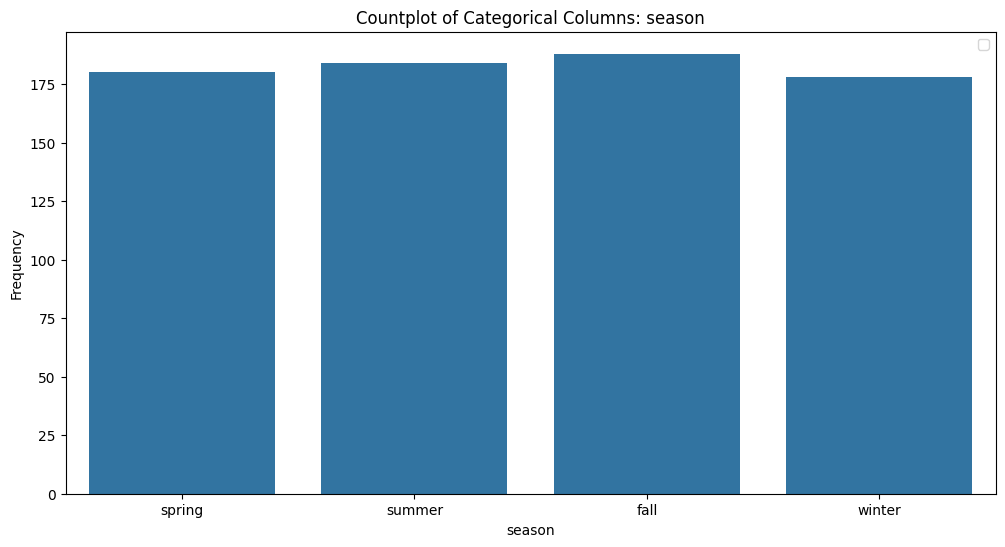

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


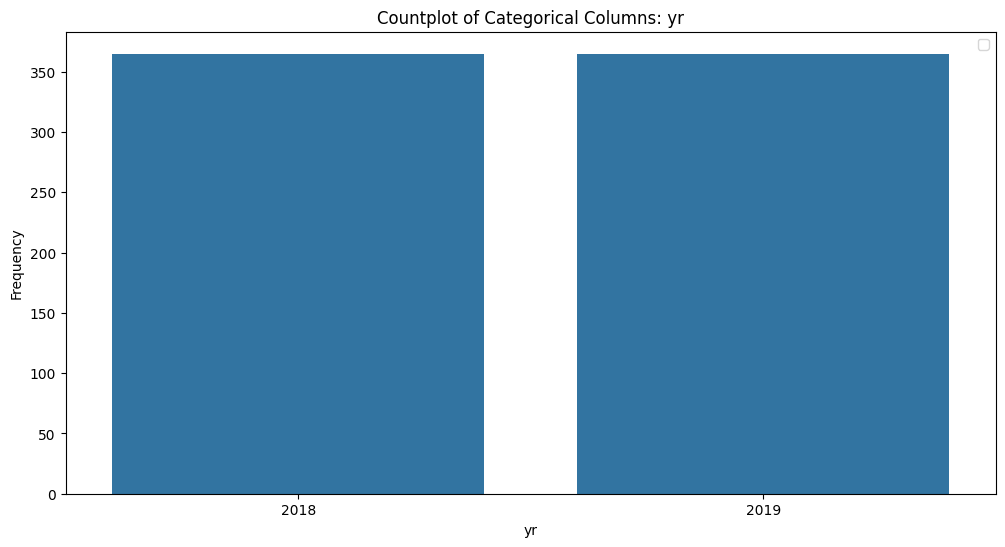

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


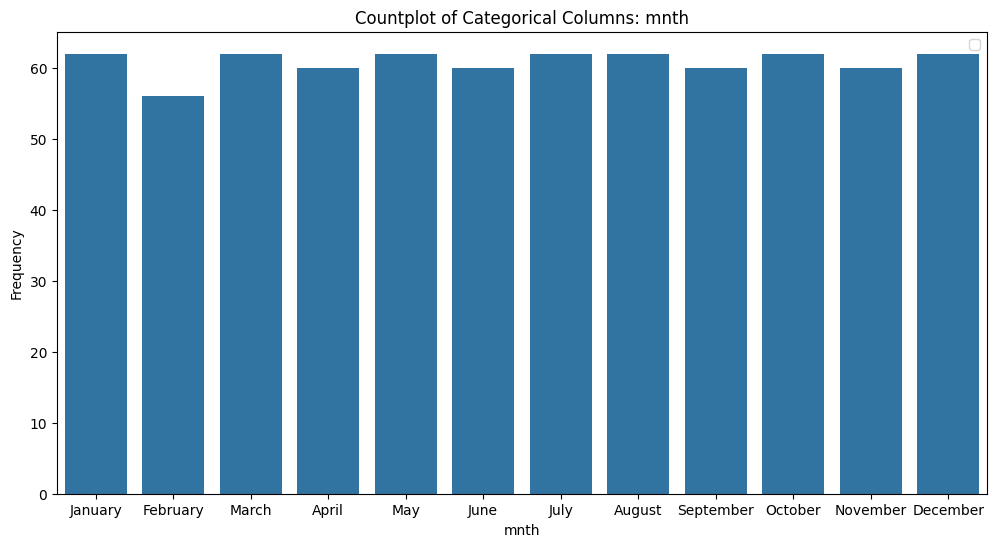

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


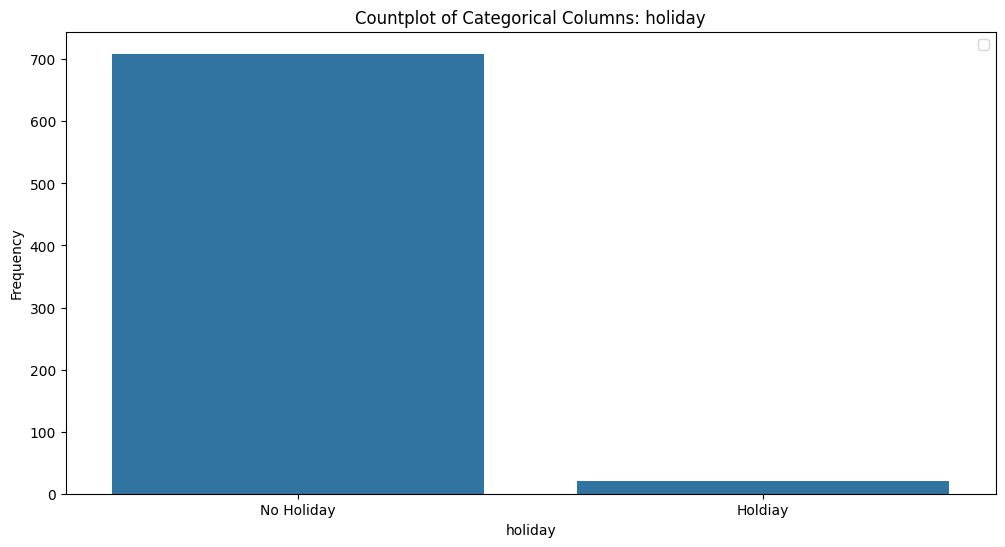

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


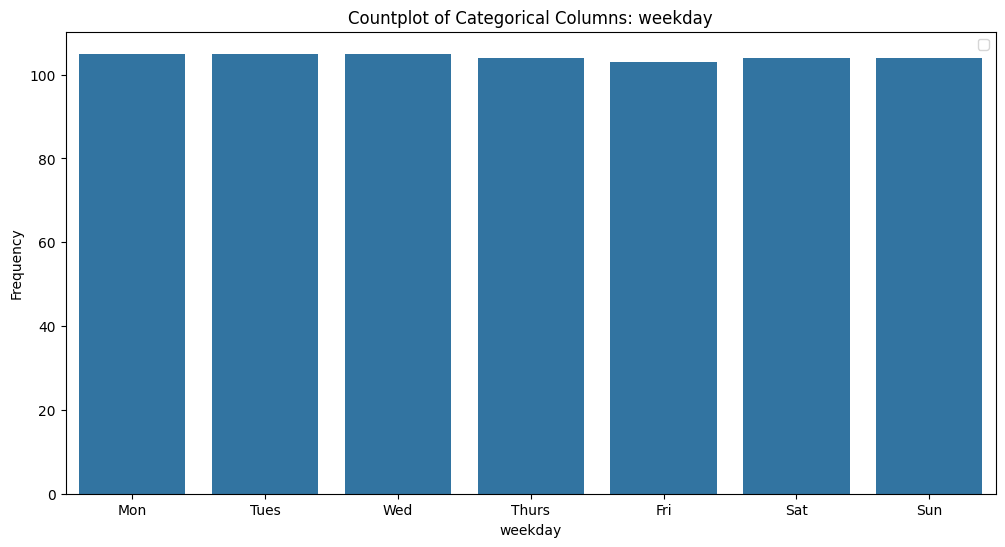

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


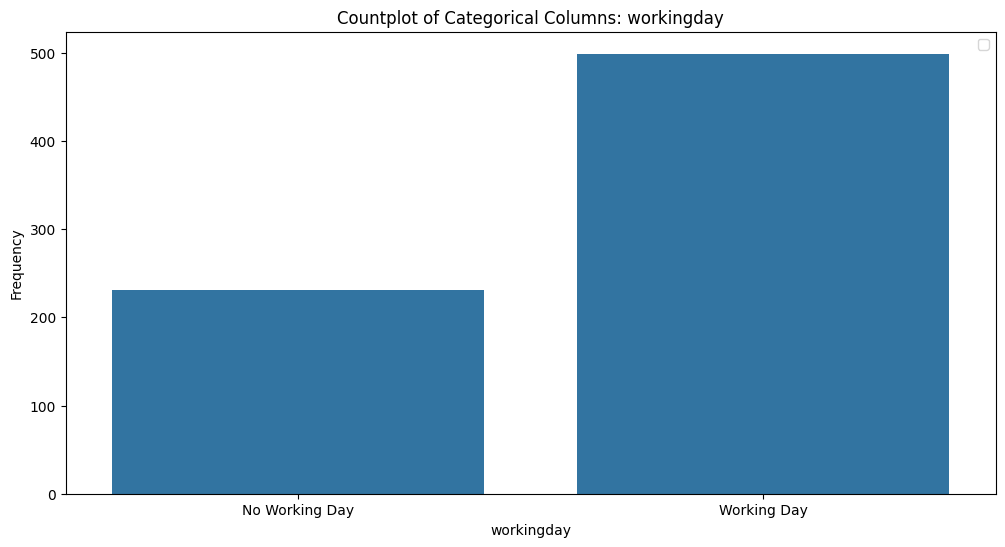

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


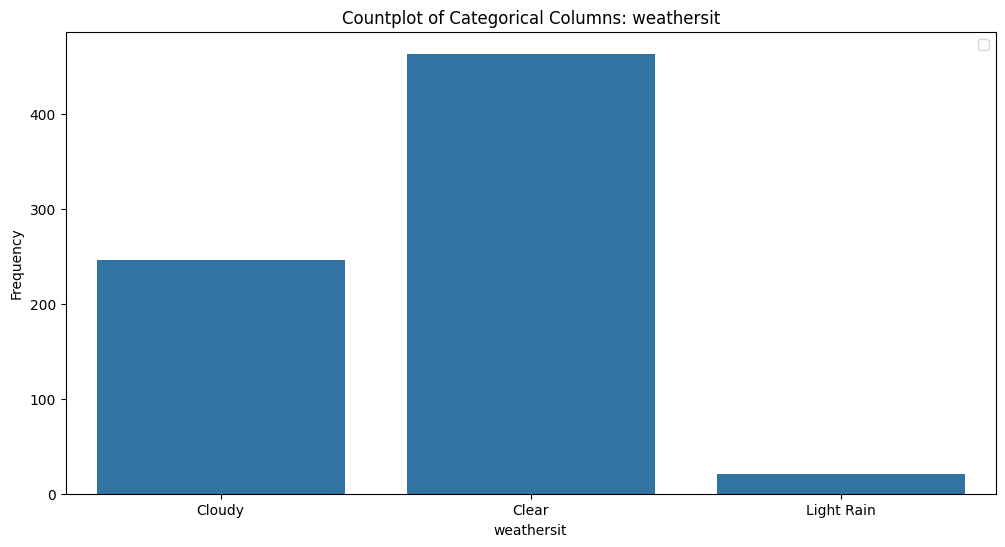

In [92]:
##Univariate Analysis for Categorical Columns

data_mapped['yr'] = data_mapped['yr'].astype(str)

# Iterate over each categorical column
for cat in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x = data_mapped[cat])

    # Add labels and title
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.title('Countplot of Categorical Columns: '+ cat)
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


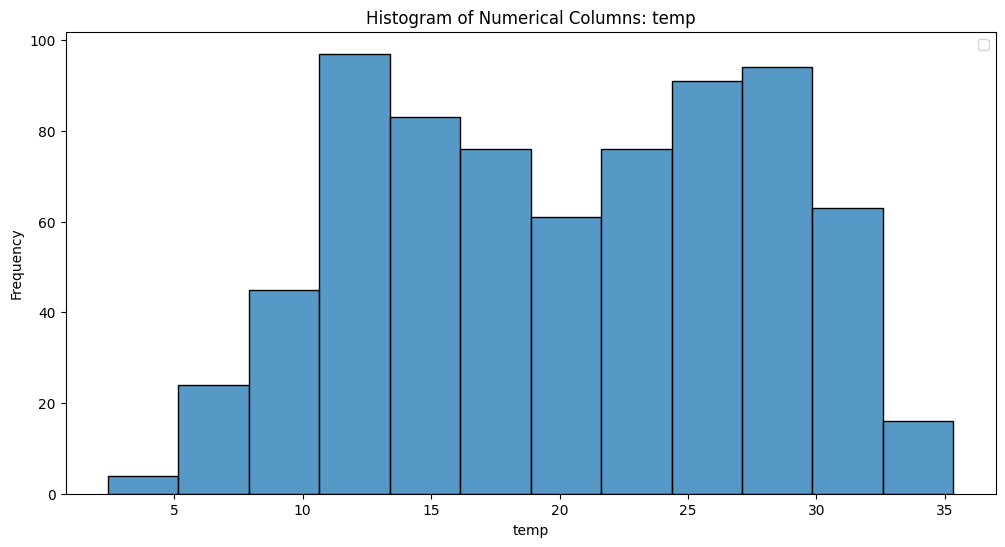

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


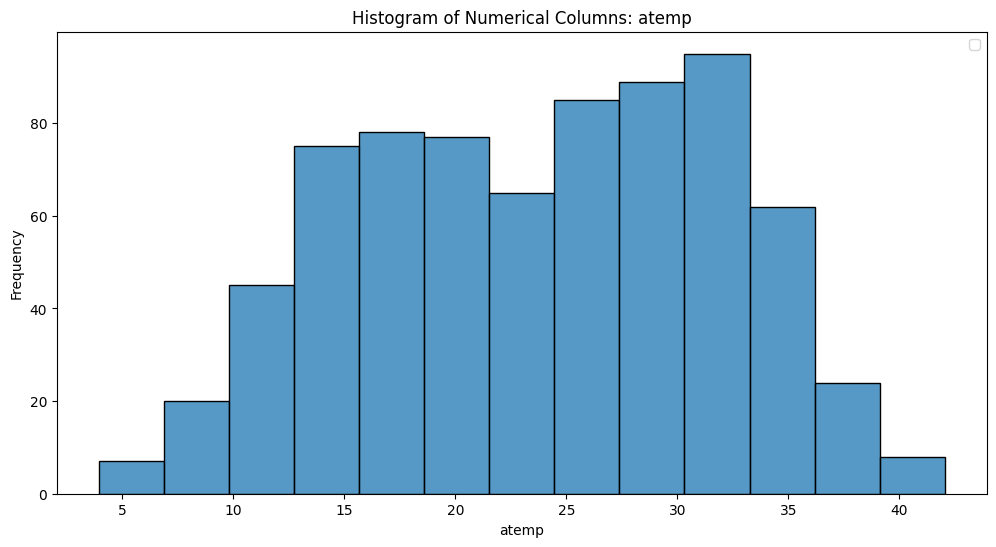

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


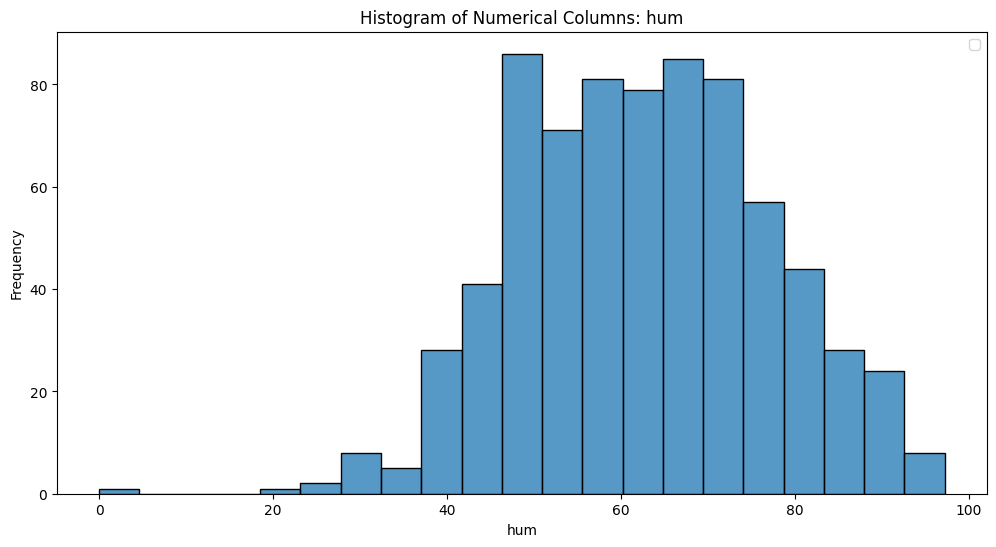

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


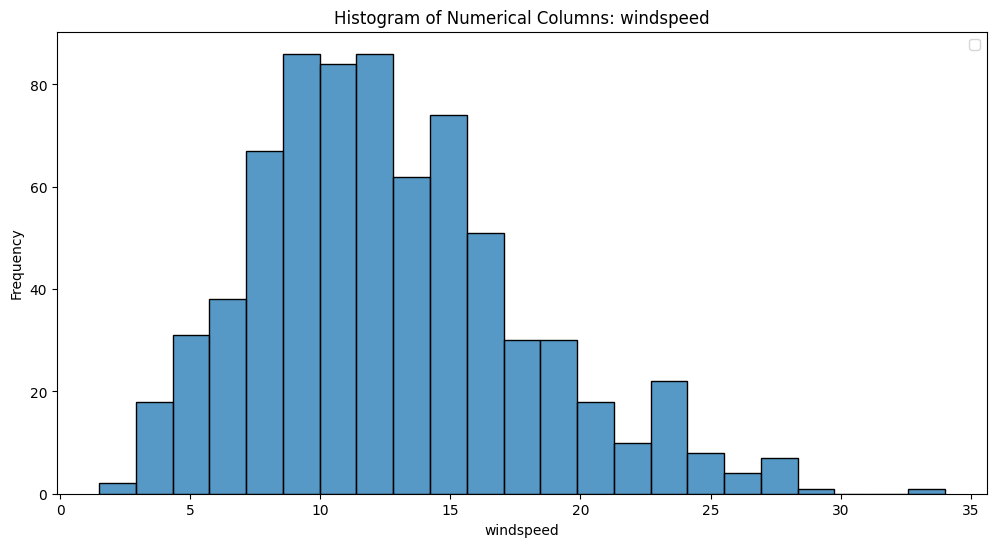

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


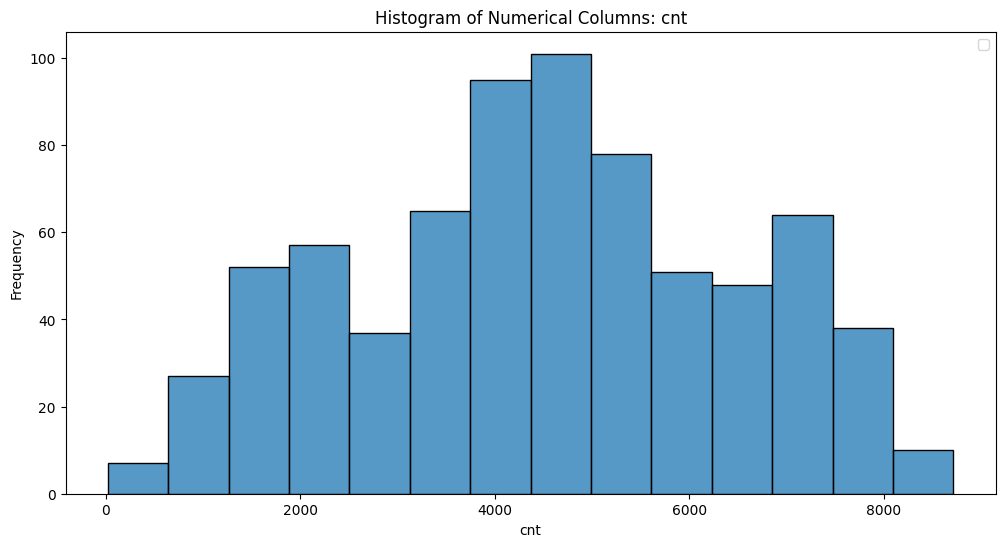

In [93]:
##Univariate Analysis for Numerical Columns

for num in num_cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(x = data_mapped[num])

    # Add labels and title
    plt.xlabel(num)
    plt.ylabel('Frequency')
    plt.title('Histogram of Numerical Columns: '+ num)
    plt.legend()

    # Show the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


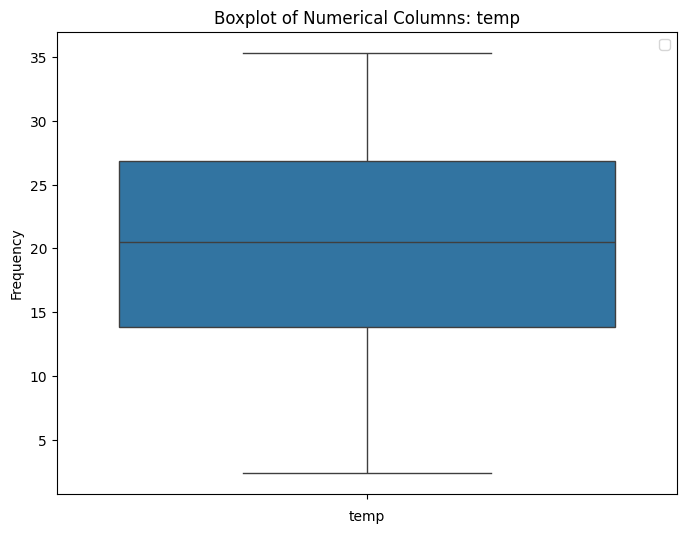

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


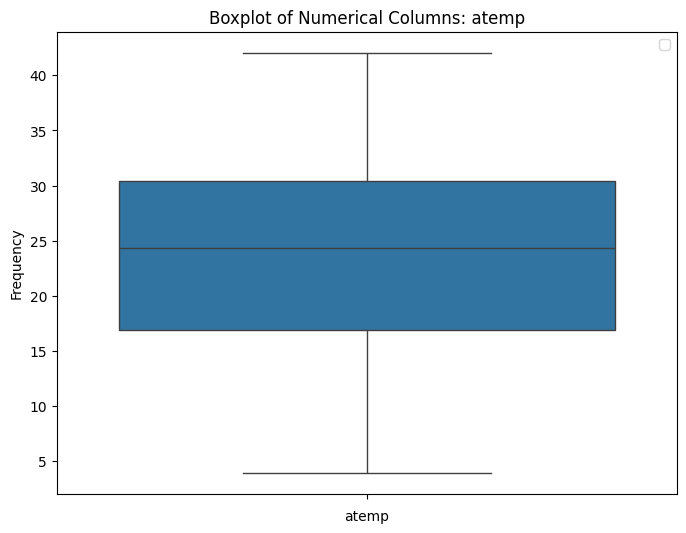

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


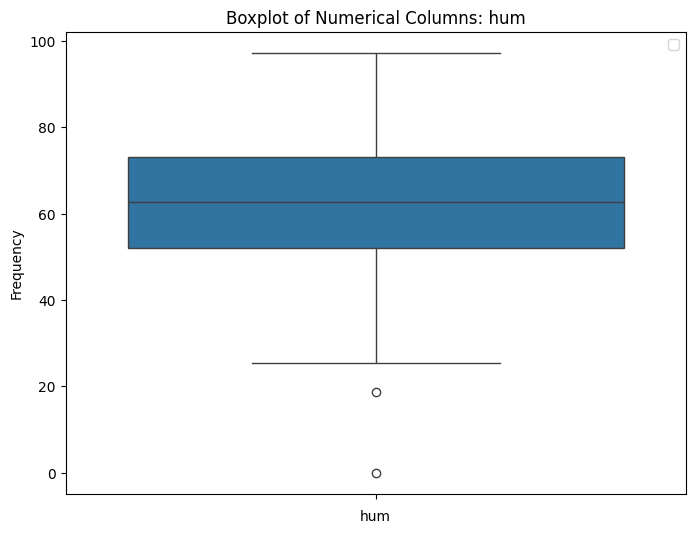

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


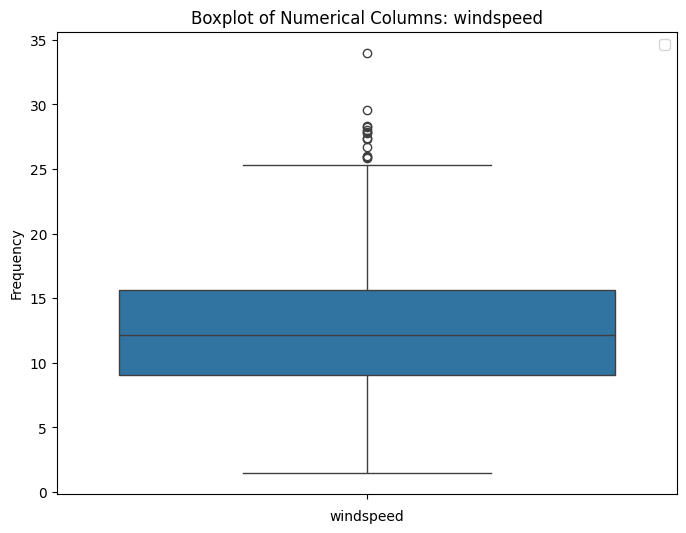

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


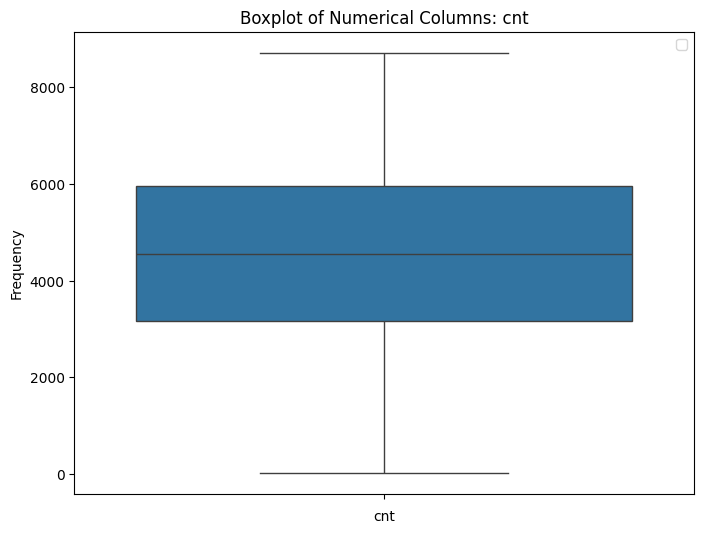

In [94]:
##Univariate Analysis for Numerical Columns

for num in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y = data_mapped[num])

    # Add labels and title
    plt.xlabel(num)
    plt.ylabel('Frequency')
    plt.title('Boxplot of Numerical Columns: '+ num)
    plt.legend()

    # Show the plot
    plt.show()

In [ ]:
## Bivariate Analysis of Categorical vs Numerical Columns

for cat in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(12, 6))
        sns.barplot(x = data_mapped[cat] ,y = data_mapped[num])

        # Add labels and title
        plt.xlabel(num)
        plt.ylabel('Frequency')
        plt.title(f'Barplot of {cat} Vs {num}')
        plt.legend()

        # Show the plot
        plt.show()

In [ ]:
## Bivariate Analysis of Numerical vs Numerical Columns

for num1 in num_cols:
    for num2 in num_cols:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x = data_mapped[num1] ,y = data_mapped[num2])

        # Add labels and title
        plt.xlabel(num1)
        plt.ylabel(num2)
        plt.title(f'Scatterplt of {num1} Vs {num2} Columns')
        plt.legend()

        # Show the plot
        plt.show()

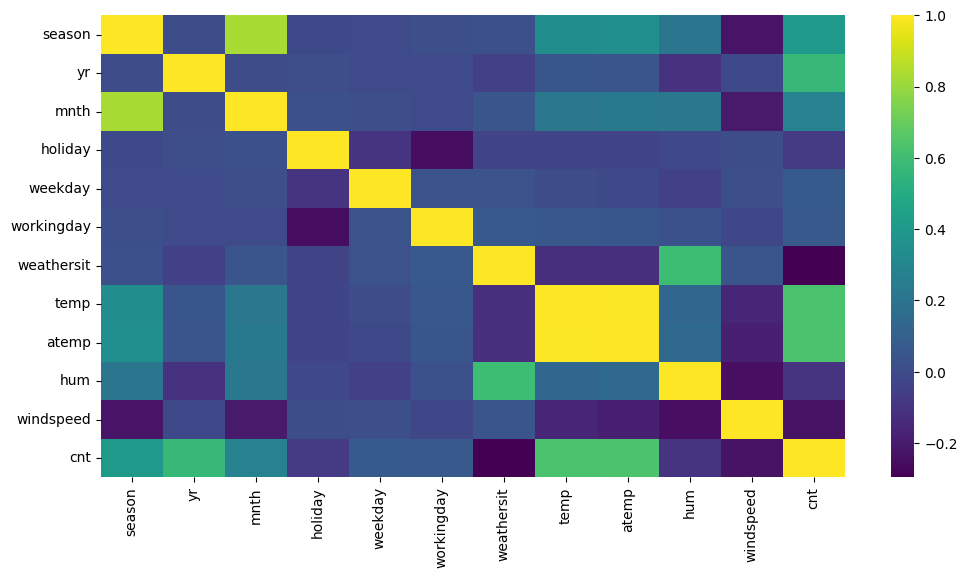

In [103]:
## Multivariate Analysis
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='viridis')
plt.show()